# Assignment Week 8

In this assignment a dataset will be loaded and some minor cleanup will be performed. The exploratory data analysis will be used to learn about the distribution of variables and the relationship between variables.

In [7]:
# importing pandas and seaborn modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In this step we will read the data table from the web and assign names to each columns

In [8]:
# reading data and assigning column names
data = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep = '\s+',
                    names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year',
                            'origin','car make'],header = None).set_index('car make')
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car make,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1
ford galaxie 500,15.0,8,429.0,198.0,4341.0,10.0,70,1
chevrolet impala,14.0,8,454.0,220.0,4354.0,9.0,70,1
plymouth fury iii,14.0,8,440.0,215.0,4312.0,8.5,70,1
pontiac catalina,14.0,8,455.0,225.0,4425.0,10.0,70,1


In this step before we look for missing data we can check the data types, if any of the data returns as a string it will be converted to numeric value.

In [9]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [10]:
# converts to numeric value
data['horsepower'] = pd.to_numeric(data['horsepower'], errors = 'coerce')

In this step we can check if missing value exists in any of the columns

In [11]:
# returns missing data condition
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

By running simple statement we can calculate how many missing values exists

In [12]:
# sums missing values per column
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

Next, we can display the missing data to see the fields that are missing

In [13]:
# displays missing values in the table
data[data['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car make,,,,,,,,
ford pinto,25.0,4,98.0,NaN,2046.0,19.0,71,1
ford maverick,21.0,6,200.0,NaN,2875.0,17.0,74,1
renault lecar deluxe,40.9,4,85.0,NaN,1835.0,17.3,80,2
ford mustang cobra,23.6,4,140.0,NaN,2905.0,14.3,80,1
renault 18i,34.5,4,100.0,NaN,2320.0,15.8,81,2
amc concord dl,23.0,4,151.0,NaN,3035.0,20.5,82,1


In this step we replace missing values with '0'

In [14]:
# replaces missing values
data['horsepower'].fillna(0, inplace=True)


We can verify if data have been properly replaced

In [15]:
# sums missing values per column
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In this step we replace original data for column "origin" from numeric value to string that represents country of origin

In [16]:
# replaces numeric values with string names
data['origin'].replace({1:'USA',2:'Asia',3:'Europe'}, inplace = True)
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car make,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,USA
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,USA
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,USA
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,USA
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,USA


Next, we will use seaborn to graph distribution for cylinders

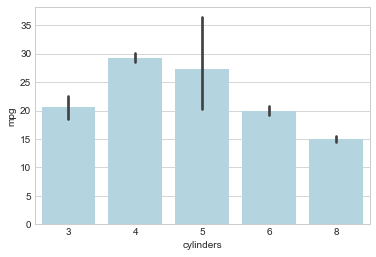

In [17]:
sns.set_style('whitegrid')
sns.barplot(x = 'cylinders', y = 'mpg', color = 'lightblue', data=data)
sns.set()

Next, we will use a scatterplot that shows the relationship between horsepower and weight. In addition we will show the graphs by origin.

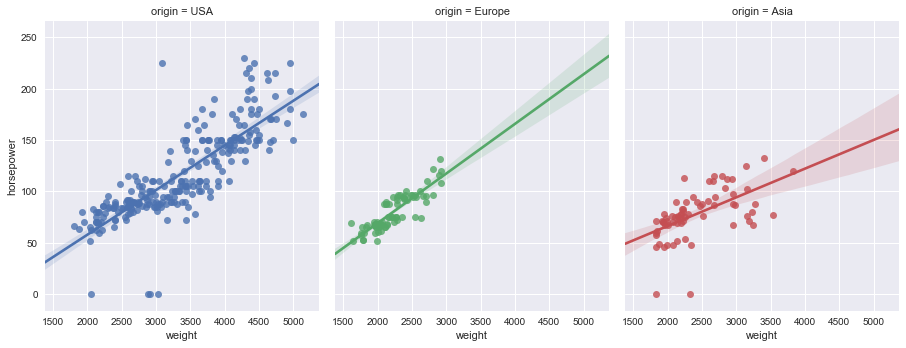

In [18]:
sns.lmplot(x="weight", y="horsepower", hue="origin", col="origin", data=data, aspect=.85, x_jitter=.1)

What is the distribution for acceleration?

In this step we will use Matplotlib to graph distribution of acceleration

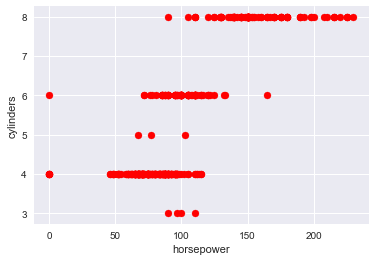

In [19]:
plt.scatter(data.horsepower,data.cylinders, color = 'r')

plt.xlabel('horsepower')
plt.ylabel('cylinders')
plt.show()

In this step we will use Seaborn to graph distribution of acceleration

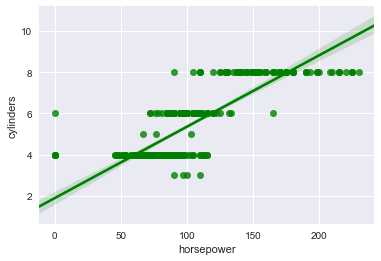

In [20]:
sns.regplot(x=data.horsepower, y=data.cylinders, data=data, color='g')